# **Lab 5: Quadrature**
**Kristoffer Almroth**

# **Abstract**

Fifth lab in the course DD2363 Methods in Scientific Computing. This lab is about quadrature.

# **Set up environment**

Dependencies needed for running the code.

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import sympy as sp
from sympy import *
import random

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

import unittest

# **Introduction**

In this lab we will perform numeric and stocastic approximations of the integrals of different functions in one and two dimensions. The numeric methods that will be used is 2-point Gauss quadrature over the unit interval and 3-point edge midpoint Gauss quadrature over the unit triangle. The stocastic methods are Monte Carlo integration over the unit interval and Monte Carlo integration over the unit triangle.

# **Methods**

### 2-point Gauss quadrature over a unit interval###

2-point Gauss quadrature over the interval $I = [1-,1]$ should be exact for all cubic polynomials $p \in P^3 ([-1,1])$

$\int_{I} p(x) dx = p(x_0)w_0 + p(x_1)w_1$

Solving this equation gives us the weights $w_0 = w_1 = 1$ and the points $x_0 = \frac{1}{\sqrt{3}}$ and $x_1 = \frac{-1}{\sqrt{3}}$

For the interval $I = [0,1]$ we get $w_0 = w_1 = 0.5$, $x_0 = \frac{1}{2\sqrt{3}}+0.5$ and $x_1 = \frac{-1}{2\sqrt{3}}+0.5$. [Source](https://math.stackexchange.com/questions/1544918/gaussian-quadrature-with-a-to-0-1-reference-domain-instead-of-a-1-1-ref).

In [0]:
def twoPointGaussQuadrature(f):
  x_0 = 0.57735026919
  x_1 = -x_0
  w_0 = w_1 = 1

  return f(x_0) * w_0 + f(x_1) * w_1

def twoPointGaussQuadrature2(f):
  x_0 = 0.78867513459
  x_1 = 0.2113248654
  w_0 = w_1 = 0.5

  return f(x_0) * w_0 + f(x_1) * w_1  

####Test####

The exact integration of the function $ax^3+bx^2+cx+d$:

$\int_{-1}^{1} ax^3+bx^2+cx+d \space dx = \frac{2b}{3}+2d$

$\int_{0}^{1} ax^3+bx^2+cx+d \space dx = \frac{a}{4}+\frac{b}{3}+\frac{c}{2}+d$

In [20]:
class Test(unittest.TestCase):

  def testRandom(self):
    for i in range(0,10000):

      a = random.randint(1,100)
      b = random.randint(1,100)
      c = random.randint(1,100)
      d = random.randint(1,100)
      f = lambda x : a*x**3+b*x**2+c*x+d

      myIntegral1 = twoPointGaussQuadrature(f)
      exactIntegral1 = 2*b/3+2*d
      myIntegral2 = twoPointGaussQuadrature2(f)
      exactIntegral2 = a/4 + b/3 + c/2 + d

      np.testing.assert_almost_equal(myIntegral1, exactIntegral1, decimal=5)
      np.testing.assert_almost_equal(myIntegral2, exactIntegral2, decimal=5)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.661s

OK


###3-point edge midpoint quadrature over a reference triangle###

The goal is to approximate the integral $\int_{0}^{1} \int_{0}^{1-x} (ax^2+by^2+cxy+dx+ey+f) \space dy dx$

Gauss quadrature is given by
$\int_{\Delta} p(x,y) dA = p(x_0, y_0)w_0 + p(x_1, y_1)w_1 + p(x_2, y_2)w_2$

where  $w_0=w_1=w_2 = \frac{1}{6}$ and $x = [0.5, 0.5, 0], y = [0, 0.5, 0.5]$

In [0]:
def threePointQuadrature(f):
  w_0 = w_1 = w_2 = 1/6
  x_0 = np.array([0.5,0])
  x_1 = np.array([0.5,0.5])
  x_2 = np.array([0,0.5])

  return f(x_0[0], x_0[1]) * w_0 + f(x_1[0],x_1[1]) * w_1 + f(x_2[0], x_2[1]) * w_2

####Test####

The exact solution to the integral is 

$\frac{1}{24}(2a+2b+c+4d+4e+12f)$. 

Source [WolframAlpha](https://www.wolframalpha.com/input/?i=double+integral+calculator&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%221-x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%221%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22ax%5E2+%2B+by%5E2+%2B+cxy+%2B+dx+%2B+ey+%2B+f%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%220%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%220%22).

In [6]:
class Test(unittest.TestCase):

  def testRandom(self):
    for i in range(0,1000):

      a = random.randint(1,100)
      b = random.randint(1,100)
      c = random.randint(1,100)
      d = random.randint(1,100)
      e = random.randint(1,100)
      g = random.randint(1,100)
      f = lambda x,y : a*x**2+b*y**2+c*x*y+d*x+e*y+g

      myIntegral = threePointQuadrature(f)
      exact = (1/24) * (2*a + 2*b + c + 4*d + 4*e + 12*g)
      np.testing.assert_almost_equal(myIntegral, exact, decimal=5)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.061s

OK


###Monte Carlo quadrature over a unit interval###

Monte Carlo quadrature is a stocastic method with the convergence rate $\frac{1}{\sqrt{n}}$. 

We get the approximation from $\frac{|D|}{n} \sum^{n}_{i=1} g(x_i)$ where $x_i$ is a random number over the interval

For the unit interval $\int_{0}^{1}$ we get $|D| = 1$

In [0]:
def monteCarloQuadrature(f, N):

  mySum = 0
  for n in range(N):
    x_i = random.uniform(0, 1)
    mySum += f(x_i)
  
  return mySum / N

###Monte Carlo quadrature over a reference triangle###

For the reference triangle we get $x_i$ as a random point in the triangle and $|D| = 0.5$. To get a uniformly random variable in the reference triangle, we calculate a point in the reference square uniformly at random, then we filter out all points not in the triangle. 

In [0]:
def monteCarloQuadratureOverTriange(f, N):

  mySum = 0
  for n in range(N):
    rand_x = 0
    rand_y = 2
    while rand_y > 1 - rand_x:
      rand_x = random.uniform(0, 1)
      rand_y = random.uniform(0, 1)

    mySum += f(rand_x, rand_y) * 0.5
  
  return mySum / N

# **Results**

The first two methods, Gauss quadrature over unit interval and Gauss quadrature over unit triangle, passed the tests against the exact integrations by up to 5 decimals or more.

The test for the Monte Carlo quadrature over the unit interval is done with the randomly generated function $ax^3+bx^2+cx+d$ with the exact integration:

$\int_{0}^{1} ax^3+bx^2+cx+d \space dx = \frac{a}{4}+\frac{b}{3}+\frac{c}{2}+d$

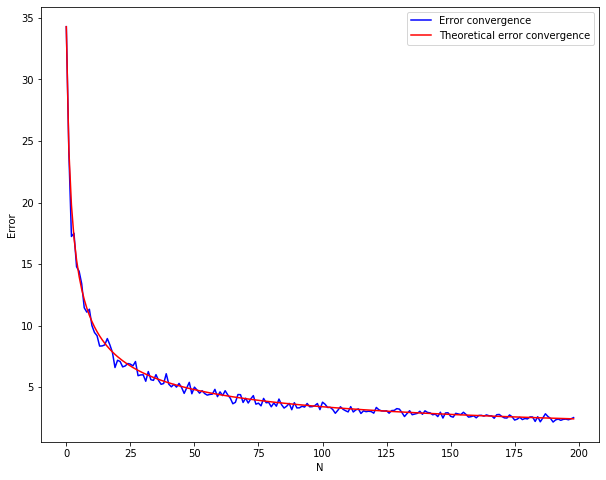

In [8]:
if __name__ == '__main__':

    a = random.randint(1,100)
    b = random.randint(1,100)
    c = random.randint(1,100)
    d = random.randint(1,100)
    f = lambda x : a*x**3+b*x**2+c*x+d

    N = 200
    M = 200
    approx = np.zeros(N)
    exact = a/4 + b/3 + c/2 + d
    theoretical_convergence = np.zeros(N)
    startError = 0

    
    for n in range(1, N):
      for m in range(1, M):
        approx[n] += np.abs(monteCarloQuadrature(f, n) - exact)
  
      approx[n] = approx[n] / (M-1)
      theoretical_convergence[n] = approx[1] / sqrt(n)

    # Plot the error convergence
    plt.figure(figsize=(10,8))
    plt.plot(approx[1:], "-b", label="Error convergence")
    plt.plot(theoretical_convergence[1:], "-r", label="Theoretical error convergence")
    plt.legend(loc="upper right")
    plt.xlabel("N")
    plt.ylabel("Error")
    plt.show()

The tests for Monte Carlo quadrature over reference triangle use the same function as the tests for Gauss quadrature over the reference triangle.

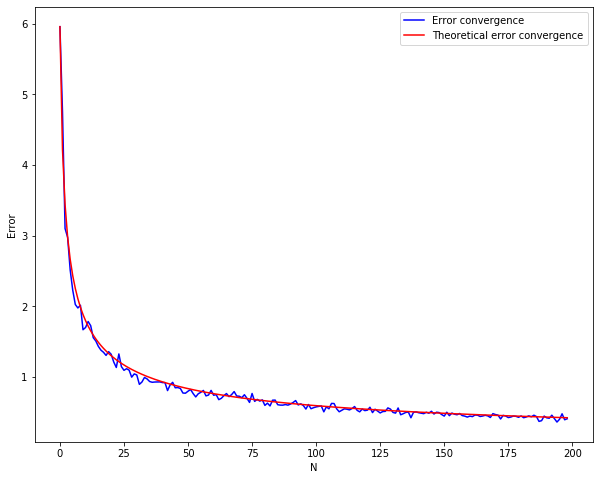

In [10]:
if __name__ == '__main__':

  a = random.randint(1,100)
  b = random.randint(1,100)
  c = random.randint(1,100)
  d = random.randint(1,100)
  e = random.randint(1,100)
  g = random.randint(1,100)
  f = lambda x,y : a*x**2+b*y**2+c*x*y+d*x+e*y+g

  N = 200
  M = 200
  approx = np.zeros(N)
  exact = (1/24) * (2*a + 2*b + c + 4*d + 4*e + 12*g)
  theoretical_convergence = np.zeros(N)
  startError = 0

  
  for n in range(1, N):
    for m in range(1, M):
      approx[n] += np.abs(monteCarloQuadratureOverTriange(f, n) - exact)

    approx[n] = approx[n] / (M-1)
    theoretical_convergence[n] = approx[1] / sqrt(n)

  # Plot the error convergence
  plt.figure(figsize=(10,8))
  plt.plot(approx[1:], "-b", label="Error convergence")
  plt.plot(theoretical_convergence[1:], "-r", label="Theoretical error convergence")
  plt.legend(loc="upper right")
  plt.xlabel("N")
  plt.ylabel("Error")
  plt.show()

# **Discussion**

Creating numerical approximations for integrals was fun. It is especially interesting trying out stocastic methods, and seeing how well they perform against the other methods. 